In [1]:
import sounddevice as sd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy.io.wavfile as wav
from scipy.fftpack import fft, ifft, fftfreq
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = [16, 5]

In [2]:
def str2bits(str):
    res = bin(int.from_bytes(str.encode('ascii'), 'big'))[2:]
    return '0'*(8 - (len(res) % 8)) + res

In [3]:
from pam import SoundCommunication

In [4]:
msg = """
[ 7071.657145] CPU3: Core temperature above threshold, cpu clock throttled (total events = 88)
[ 7071.657156] CPU2: Core temperature above threshold, cpu cloc
"""

In [5]:
r = str2bits(msg)
# sync = ''.join(map(lambda x: str(int(x)), np.random.rand(100) > 0.5))
comm = SoundCommunication(44100, 200, 1000, 2000)

from testing import Tester
t = Tester(comm)
S = comm.send(r)

In [6]:
assert comm.decode(t.pad(S))[:len(r)] == r

In [7]:
# sd.play(t.pad(S), comm.FS)

In [8]:
# sd.stop()

In [ ]:
_, W = wav.read('w.wav')

In [10]:
# wav.write('w.wav', data=W, rate=comm.FS)

In [ ]:
W = sd.rec(int(10 * comm.FS), channels=1, samplerate=comm.FS, blocking=True).ravel()

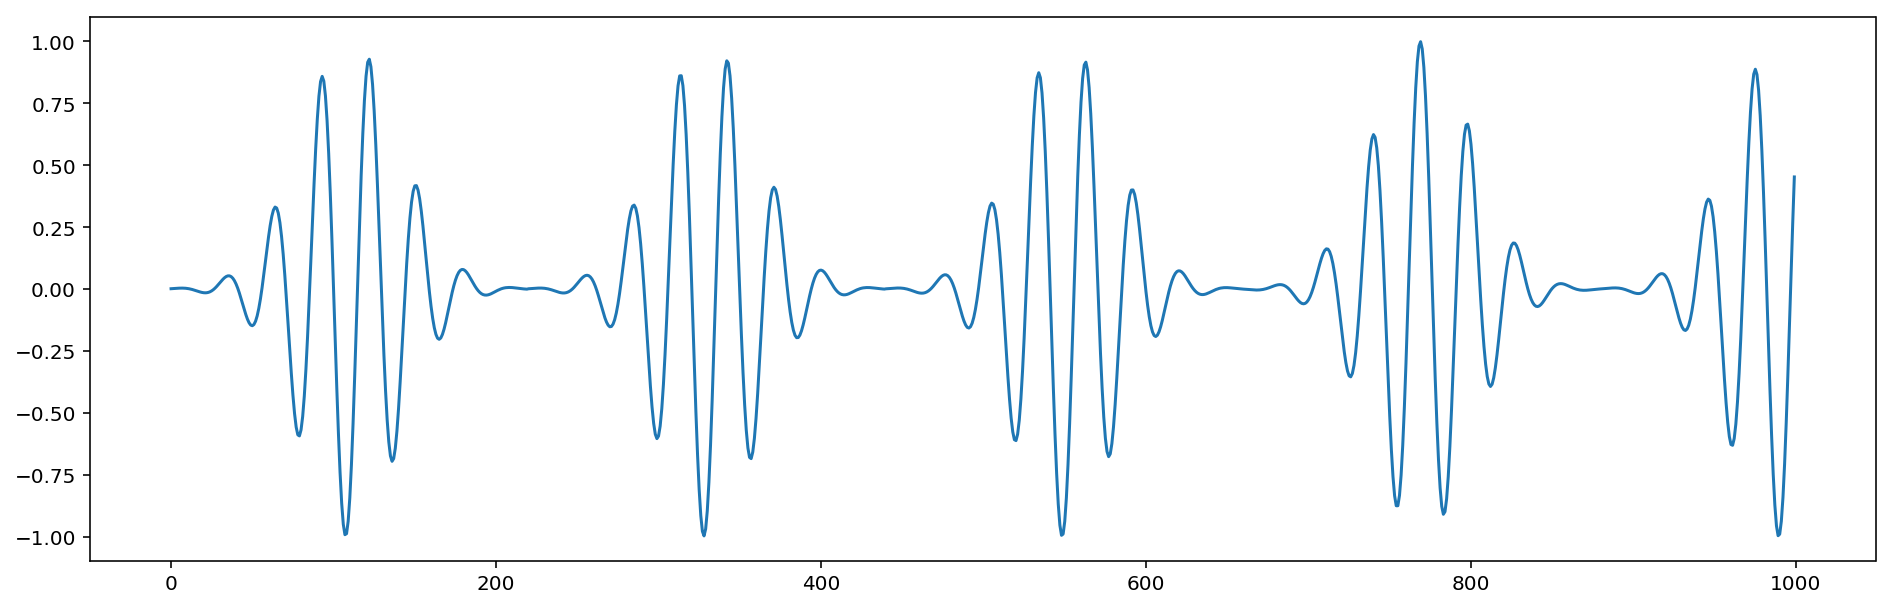

In [31]:
plt.plot(S[44000:45000])

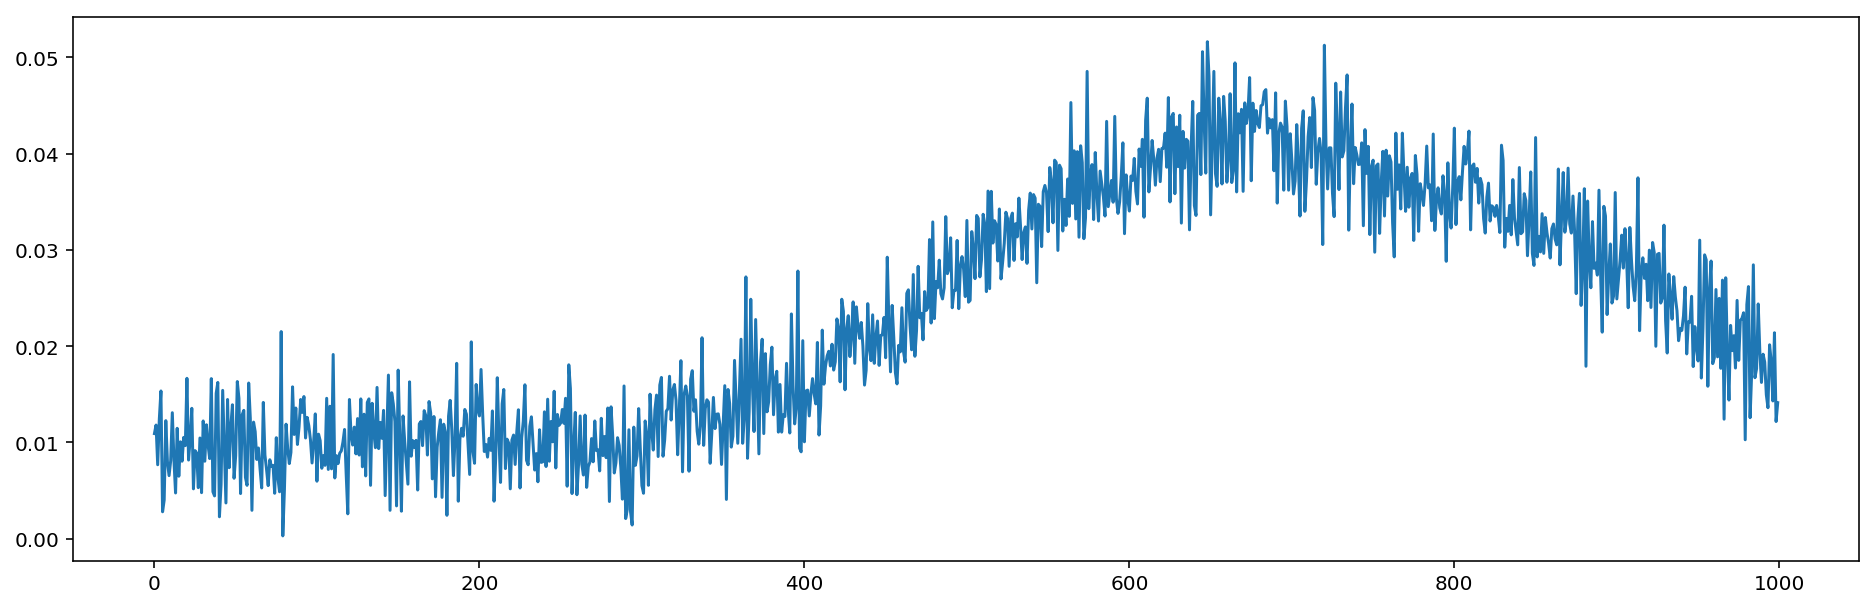

In [32]:
plt.plot(W[44000:45000])

In [ ]:
plt.plot(W[60420:62000])

In [24]:
wr = comm.decode(W)
t.diff(wr[:len(r)], r)

('000X1010010X1X110X10XX00X01XX11XXX11X000001XX111XX1XX00X00XX11100011X1X0001XX10X00XXX11X0X11X00X0011X1000011XXXX010111X10X1X0000X100001XX1X1X000XXXXX1010X110XXX0XX11XX0XX1XX000X100001101X01X1X011100X0X110X1010X10X000XX11XX00X110XX0101101X0XX1110000X110XX0XX1X100X0X110X00XX111X100X11XXX0XX1X100X0X110X1010X1XX000X11X0001X1XX00X001X0111XXX11X1X0XX10X1010X1XX0000111XX00011X1000X111X0X0X110XX0XX11100X101XX100001X01X110X1X1X000X1XX10X001X11000X1XX000X1X0X01XX111X000X11XX101XX1XX000X1X00011X1XX1X0001101X11X1X0001101X01X11XX10X000XX11XX0X011X10000111X0X0X1X01XXXXX11X100XX11XX0X011X1X000110XX01X11XX1000X1XXX000X1X1000X111XX0001X0111XXX11XX00X110X001011X11000X1XX000X110XX0XX1X1X1X0X110XX0101XX11X00X11XX00X1110XX1XX10XX00001111010X1XX0000X111X000X111X000X1010X10X0X1X1001011X11XX10XX00X01XX111X011XX00001XX1110X1XX00X0XX011100011X1X0001XX10X00XXX11X0X1XXX0X001XX10X00X1X1100X0111010X1XX000X100001XX1X1X000XXXXX1010X110XX00XX11XX00X1XX000X100001101X0111X011100X0X110X1010X10X000XX11XX00X110XX0101101X

In [ ]:
W = sd.playrec(t.pad(S), channels=1, samplerate=comm.FS).ravel()